Name :Divyadharshini S
Roll no:24BAD022
Bottle: (864863, 5)
Cast: (34404, 3)
Merged: (14468296, 7)

Linear Regression Results
MSE : 3.576080054903787
RMSE: 1.8910526314473077
R²  : 0.7607180125857246 




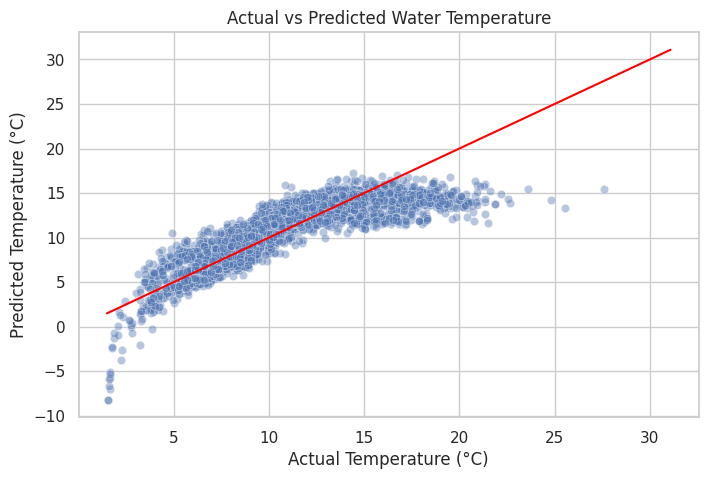


Ridge R²: 0.7607180125999131
Lasso R²: 0.7606965382233566


In [5]:
print("Name :Divyadharshini S\nRoll no:24BAD022")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
bottle_cols = ['Sta_ID', 'Depthm', 'Salnty', 'O2ml_L', 'T_degC']
cast_cols = ['Sta_ID', 'Lat_Dec', 'Lon_Dec']
bottle = pd.read_csv("/kaggle/input/calcofi/bottle.csv",usecols=bottle_cols)
cast = pd.read_csv("/kaggle/input/calcofi/cast.csv",usecols=cast_cols)
print("Bottle:", bottle.shape)
print("Cast:", cast.shape)
bottle = bottle.dropna(subset=['T_degC'])
bottle = bottle.sample(n=100_000, random_state=42)
data = pd.merge(bottle, cast, on='Sta_ID', how='inner')
print("Merged:", data.shape)
data.fillna(data.median(numeric_only=True), inplace=True)
X = data[['Depthm', 'Salnty', 'O2ml_L', 'Lat_Dec', 'Lon_Dec']]
y = data['T_degC']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression Results")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2,"\n\n")
sample_idx = np.random.choice(len(y_test), size=5000, replace=False)
plt.figure()
sns.scatterplot(
    x=y_test.iloc[sample_idx],
    y=y_pred[sample_idx],
    alpha=0.4
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Water Temperature")
plt.show()
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

print("\nRidge R²:", r2_score(y_test, ridge.predict(X_test_scaled)))
print("Lasso R²:", r2_score(y_test, lasso.predict(X_test_scaled)))


Name :Divyadharshini S
Roll no :24BAD022
Accuracy : 0.5888738127544098
Precision: 1.0
Recall   : 0.013029315960912053
F1-Score : 0.02572347266881029





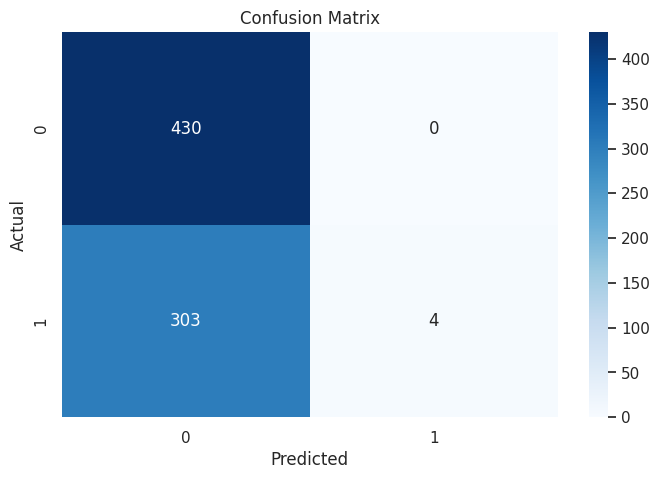

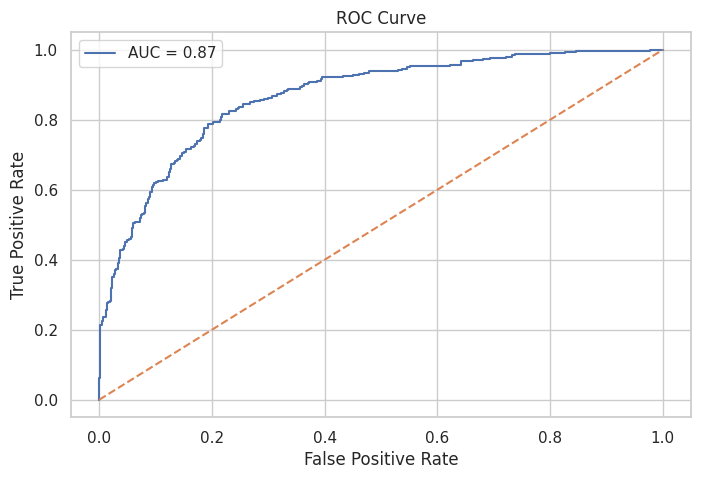

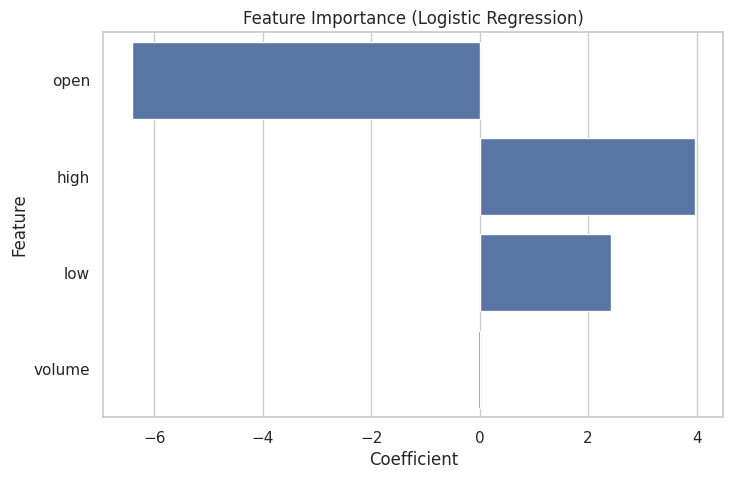




Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score : 0.7943565581840231


In [20]:
print("Name :Divyadharshini S\nRoll no :24BAD022")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
df = pd.read_csv("/kaggle/input/lic-stock-price-data/LICI - 10 minute data.csv")
df.columns = df.columns.str.lower()
df['price_movement'] = (df['close'] > df['open']).astype(int)
features = ['open', 'high', 'low', 'volume']
X = df[features]
y = df['price_movement']
X = X.fillna(X.median())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("\n\n")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("\n\n")
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("\n\n")
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_reg.coef_[0]
})
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=feature_importance
)
plt.title("Feature Importance (Logistic Regression)")
plt.show()
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train_scaled, y_train)
print("\n\n")
print("Best Parameters:", grid.best_params_)
print("Best F1 Score :", grid.best_score_)